In [2]:
def create_freq_dict(channelFreq: float, bandwidth: float, n: int) -> dict:
    """ Creates a dictionary of frequencies for the given channel """
    freqDict = {}
    freqs = np.linspace(channelFreq - bandwidth / 2 + bandwidth / (2 * n),
                        channelFreq + bandwidth / 2 - bandwidth / (2 * n), n)

    for index, item in enumerate(freqs):
        freqDict[index] = item

    return freqDict

In [3]:
create_freq_dict(600, 800, 2)

{0: 400.0, 1: 800.0}

In [1]:
import matplotlib.pyplot as plt
import pickle
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from Sender import *
from Receiver import *

import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile


In [61]:
receiver = Receiver(600, 800)
fs, audio = wavfile.read("audio3.wav")

In [62]:
index = receiver.header_correlation(audio, 10)
index

107588

In [50]:
157888/44100

3.5802267573696147

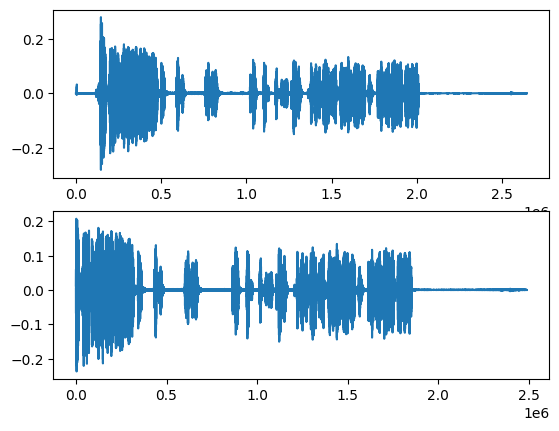

In [5]:
fig, ax = plt.subplots(2,1)

ax[0].plot(audio)
ax[1].plot(audio[index:])

In [6]:
t = np.linspace(0, len(audio[index:]/44100, len(audio[index:])))

audio[index:]*np.cos(2*np.pi*400*(t))

TypeError: len() takes exactly one argument (2 given)

In [7]:
t = np.linspace(0, len(audio[index:])/44100, len(audio[index:]))

audio[index:]*np.cos(2*np.pi*400*(t))

array([ 0.01266479,  0.01587384,  0.01858589, ..., -0.00011827,
       -0.00012357, -0.00012847])

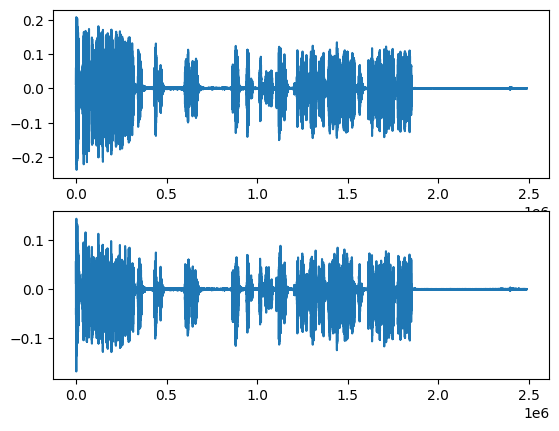

In [8]:
fig, ax = plt.subplots(2,1)

ax[0].plot(audio[index:])
ax[1].plot(audio[index:]*np.cos(2*np.pi*400*(t)))

In [9]:
audio_cosineless = audio[index:]
audio_cosine = audio[index:]*np.cos(2*np.pi*400*(t))

In [16]:
audio_final = np.convolve(audio_cosine, np.ones(1000))/1000


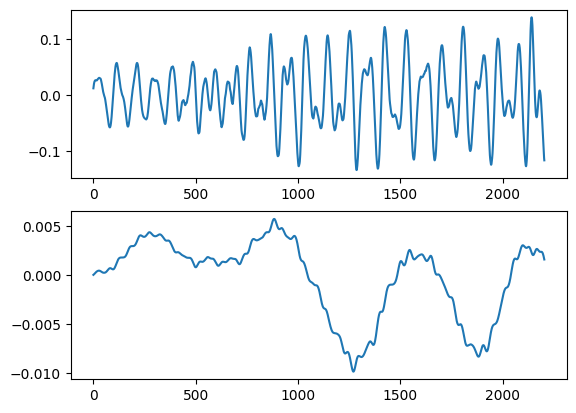

In [21]:
fig, ax = plt.subplots(2,1)

ax[0].plot(audio_cosineless[0:int(44100*0.05)])
ax[1].plot(audio_final[0:int(44100*0.05)])

In [29]:
# Fourier transform of window

fft_result = np.fft.fft(audio_cosineless[0:int(44100*0.05)])

# Plot frequencies of fourierr

freq = np.fft.fftfreq(len(fft_result), 1 / 44100)

max_idx = np.argmax(np.abs(fft_result))
max_freq = freq[max_idx]

In [30]:
max_freq

480.0

In [31]:
sender = Sender(600, 800)
sender.load_text('./data/text.txt')
audio = sender.send_text()

In [32]:
index = receiver.header_correlation(audio, 10)

In [33]:
index

44100

In [35]:
delta = int(0.05*44100)
audio = audio[index:index+delta]

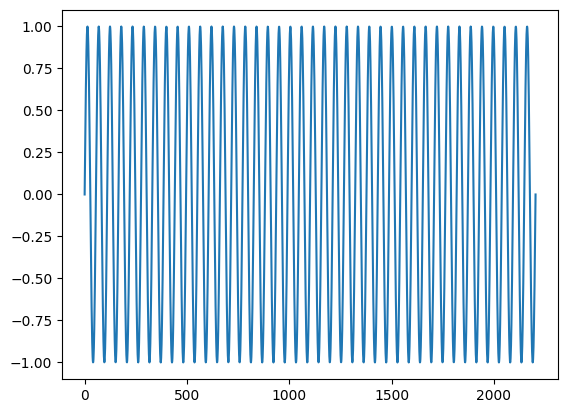

In [36]:
plt.plot(audio)

In [37]:
fft_result = np.fft.fft(audio)

# Plot frequencies of fourierr

freq = np.fft.fftfreq(len(fft_result), 1 / 44100)

max_idx = np.argmax(np.abs(fft_result))
max_freq = freq[max_idx]

In [39]:
abs(max_freq)

800.0

In [41]:
audio = sender.send_text()

In [42]:
index

44100

In [43]:
audio[index:]

array([ 1.86245350e-14,  1.13785427e-01,  2.26092861e-01, ...,
       -1.13785429e-01, -5.69853151e-02, -1.33698646e-09])

In [44]:
delta

2205

In [45]:
audio[index+delta:index+delta*2]

array([ 1.37259478e-14,  5.69853138e-02,  1.13785427e-01, ...,
       -1.13785427e-01, -5.69853138e-02,  3.72490701e-14])

In [46]:
audio2 = audio[index+delta:index+delta*2]


In [48]:
fft_result = np.fft.fft(audio)

# Plot frequencies of fourierr

freq = np.fft.fftfreq(len(fft_result), 1 / 44100)

max_idx = np.argmax(np.abs(fft_result))
max_freq = freq[max_idx]
max_freq

-400.0

In [53]:
firstStep = audio[index:index+delta]

In [54]:
firstStep

array([ 0.01266479,  0.01589966,  0.01870728, ..., -0.10684204,
       -0.11206055, -0.11611938], dtype=float32)

In [56]:
fft_result = np.fft.fft(firstStep)

# Plot frequencies of fourierr

freq = np.fft.fftfreq(len(fft_result), 1 / 44100)

max_idx = np.argmax(np.abs(fft_result))
max_freq = abs(freq[max_idx])
max_freq

480.0

In [57]:
freq

array([  0.,  20.,  40., ..., -60., -40., -20.])

In [58]:
max(freq)

22040.0

In [59]:
np.argmax(np.abs(fft_result))

24